# Lattice 2D

In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
from LRGSG_package.LRGSG_plots import imshow_colorbar_caxdivider
from LRGSG_package.LRGSG_utils import move_to_rootf, width_interval
from LRGSG_package.nx_patches import signed_spectral_layout, signedlaplacian_spectrum
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
side = 50
eigenmode = 0
#
theLattice = Lattice2D(#
    side1 = side,
    geometry = 'squared',
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
    initCond = 'all_1', # f'ground_state_{eigenmode}'
    pflip = 0.2,
    t_steps = 10,
    no_obs = 200
)
SLRG_obj.init_weights()
#
# neg_weightsG = {((i, j), (i, j+1)): -1 for i in range(SLRG_obj.system.side1) 
#                 for j in [SLRG_obj.system.side2//3, SLRG_obj.system.side2//2]}
# neg_weightsH = {(SLRG_obj.system.N//2+SLRG_obj.system.side1//2, 
#                  (SLRG_obj.system.N)//2+SLRG_obj.system.side1//2+1): -1}
# SLRG_obj.flip_sel_edges(neg_weightsH, 'H')
#
# edges_to_flip = [(0, 1), (0, 2), (0, 3), (2, 5), (1, 12)]
# neg_weights = {e: -1 for e in edges_to_flip}
# SLRG_obj.flip_sel_edges(neg_weights)
#
SLRG_obj.flip_random_fract_edges()

In [3]:
magn, ene = SLRG_obj.run_ising_dynamics(nstepsIsing=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:50<00:00, 19.67it/s]


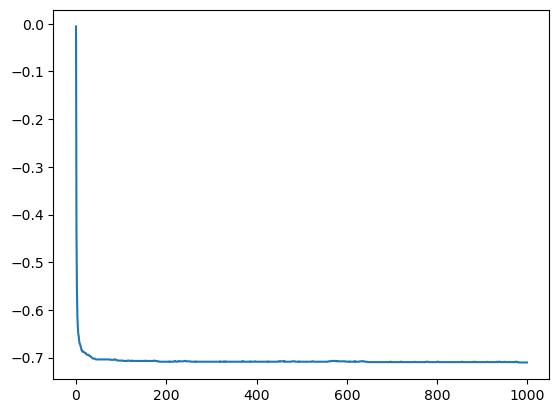

In [4]:
plt.plot(np.array(ene)/50**2)

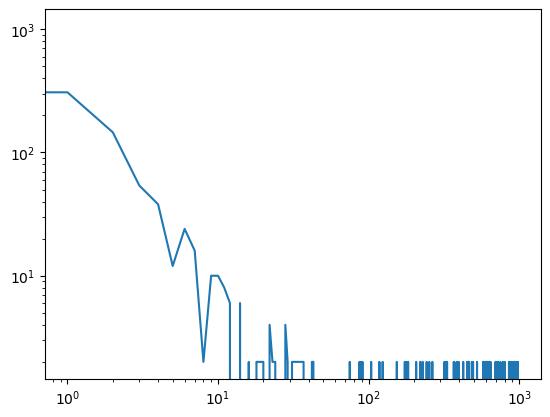

In [5]:
from LRGSG_package.LRGSG_utils import dv
plt.plot(-np.roll(dv(np.array(ene)), 10)[10:])
plt.yscale('log')
plt.xscale('log')

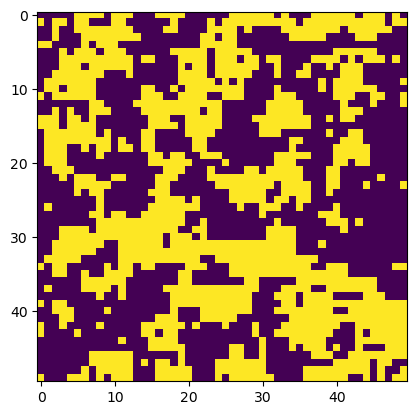

In [6]:
plt.imshow(SLRG_obj.magn_array.reshape(50, 50))

In [34]:
dv(np.array(ene))

array([-1148.85 ,  -343.656,  -171.828,  -107.892,   -85.914,   -61.938,
         -35.964,   -27.972,   -35.964,   -23.976,   -15.984,   -21.978,
         -13.986,   -17.982,    -9.99 ,   -13.986,    -5.994,   -13.986,
          -1.998,   -11.988,    -5.994,    -7.992,    -3.996,    -5.994,
          -5.994,    -3.996,   -11.988,    -1.998,    -3.996,     0.   ,
          -3.996,    -3.996,    -3.996,    -1.998,     0.   ,     0.   ,
          -3.996,    -3.996,     0.   ,    -1.998,     0.   ,    -3.996,
           0.   ,    -1.998,     0.   ,    -1.998,    -3.996,    -1.998,
          -1.998,    -3.996,    -1.998,     0.   ,    -1.998,     0.   ,
           0.   ,    -1.998,     0.   ,     0.   ,     0.   ,     0.   ,
          -1.998,     0.   ,     0.   ,    -1.998,    -1.998,    -1.998,
          -3.996,     0.   ,     0.   ,    -1.998,     0.   ,     0.   ,
           0.   ,    -1.998,    -3.996,     0.   ,    -1.998,    -3.996,
          -1.998,     0.   ,     0.   ,    -3.996, 

In [5]:
SLRG_obj.system.H[0]

AtlasView({50: {}, 1: {}, 2450: {}, 49: {}})

In [3]:
SLRG_obj.laplacian_dynamics_init(
    # window_size=1, 
    # window_shift_y=0,
    # window_shift_x=0,
    # win_val=-1
)

In [4]:
initial_state = SLRG_obj.status_array.reshape(SLRG_obj.system.syshape)
eigen_state = SLRG_obj.eigV.T[eigenmode].reshape(SLRG_obj.system.syshape)

In [5]:
SLRG_obj.run_laplacian_dynamics(
    rescaled='test',
    saveFrames=True)

Beginning Laplacian dynamics.


  0%|          | 118/24999 [00:00<01:01, 406.01it/s]

Convergence reached.


In [8]:
final_state = SLRG_obj.status_array.reshape(SLRG_obj.system.syshape)

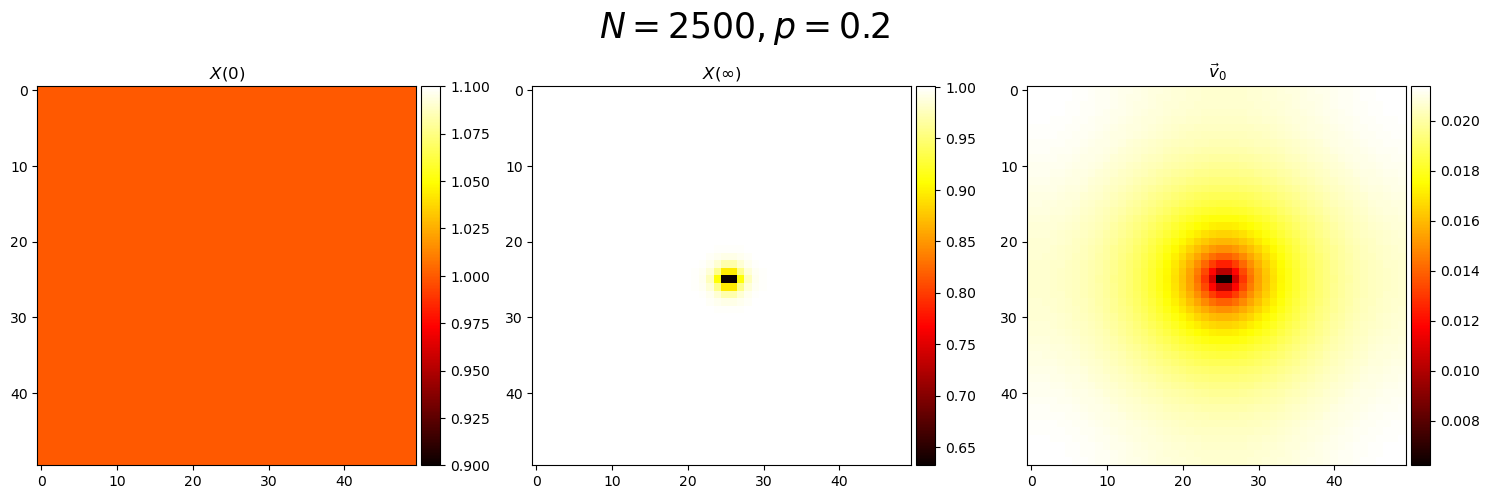

In [9]:
if np.mean(initial_state)*np.mean(eigen_state) < 0:
    eigen_state = -eigen_state
#
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#
im1 = axs[0].imshow(initial_state, cmap='hot')
_ = imshow_colorbar_caxdivider(im1, axs[0])
axs[0].set_title(r'$X(0)$')
#
im2 = axs[1].imshow(final_state, cmap='hot')
_ = imshow_colorbar_caxdivider(im2, axs[1])
axs[1].set_title(r'$X(\infty)$')
#
im3 = axs[2].imshow(eigen_state, cmap='hot')
_ = imshow_colorbar_caxdivider(im3, axs[2])
axs[2].set_title(r'$\vec{v}_0$')
#
fig.suptitle(fr'$N={SLRG_obj.system.N}, p={SLRG_obj.pflip:.3g}$', fontsize=25)
fig.tight_layout()

In [10]:
phi_plot = np.log10(np.max(final_state)-final_state)
phi_plot_nnans = phi_plot[(phi_plot != np.inf) & (phi_plot != -np.inf)]
phi_plot = np.nan_to_num(phi_plot, posinf=np.max(phi_plot_nnans), neginf=np.min(phi_plot_nnans))

/tmp/ipykernel_17922/1096686048.py:1: RuntimeWarning: divide by zero encountered in log10
  phi_plot = np.log10(np.max(final_state)-final_state)


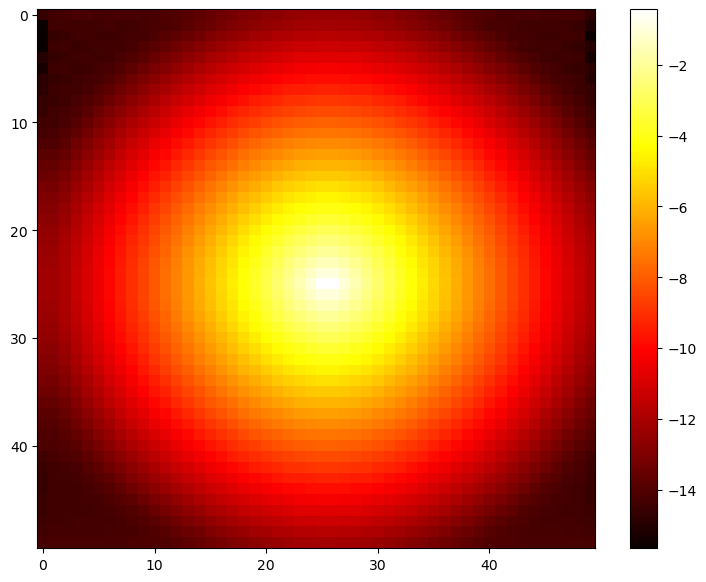

In [11]:
fig, ax1 = plt.subplots(figsize=(9, 7))
im1 = ax1.imshow(phi_plot, cmap=plt.cm.hot, aspect="auto")
plt.colorbar(im1)

In [13]:
phi_plot
halfsize = SLRG_obj.system.side1//2
hcut_halfsize = phi_plot[halfsize, :]
vcut_halfsize = phi_plot[:, halfsize]
critrad = np.sqrt(1.128/(3.14*0.103))
ball_halfsizeM = halfsize+1-critrad
ball_halfsizeP = halfsize+1+critrad

In [14]:
from scipy.optimize import curve_fit
from LRGSG_package.LRGSG_utils import line

phi_asym = hcut_halfsize[SLRG_obj.system.side1//2:]
x = np.linspace(0, len(phi_asym), num=len(phi_asym))

idx = 5
params, cov = curve_fit(line, x[:idx], phi_asym[:idx])

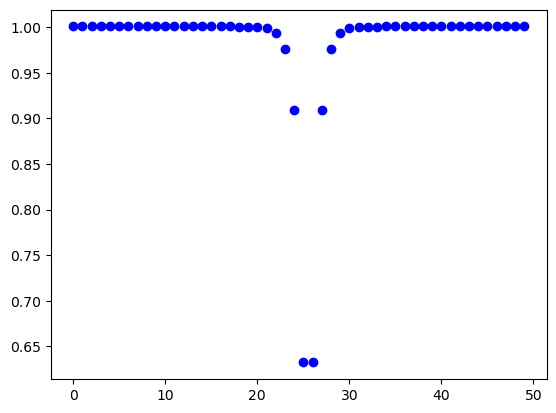

In [21]:
fig, ax = plt.subplots()

cut = final_state[halfsize, :]

ax.plot(cut, 'bo')
# xx = np.linspace(0, SLRG_obj.system.side1//2)
# ax.plot(xx+50, line(xx, *params))
# plt.yscale('log')


  0%|          | 0/100 [00:00<?, ?it/s]


AttributeError: 'Graph' object has no attribute 'N'